In [ ]:
# DEPENDENCIES OF THIS NOTEBOOK:
# 0. detectron2 | torchvision
# 1. mounted google drive of mailto://karantanwar469@gmail.com - This contains the saved model in .pth format
# 2. COCOdataset retinanet cfg ('COCO-Detection/retinanet_R_101_FPN_3x.yaml')

In [ ]:
!pip install detectron2==0.1.2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
     |████████████████████████████████| 6.2MB 47.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200716-cp36-none-any.whl size=42325 sha256=0095dfbc461f92cb887371a8f8dfc69b89a873821c68c95f7ea6de423cb4f629
  Stored in directory: /root/.cache/pip/wheels/81/99/f4/42a6bef61c07b3d78dfe6d7ebff259444c4526504cf72378d7
Successfully built fvcore
ERROR: fvcore 0.1.1.post20200716 has requirement pyyaml>=5.1, but you'll have pyyaml 3.13 which is incompatible.
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 26kB/s 
     |████████████████████████████████| 6.6MB 543kB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled to

In [ ]:
import pandas as pd
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
import json
import codecs
import requests
import urllib
import numpy as np
import pandas as pd 
from PIL import Image
from tqdm import tqdm
from io import BytesIO
import itertools
import random
import os

In [ ]:
import torch
import torchvision

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.data import datasets, DatasetCatalog, MetadataCatalog, build_detection_train_loader, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.structures import BoxMode

In [ ]:
!mv ./model_final.pth ./output

In [ ]:
# !wget https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg
!wget https://www.incimages.com/uploaded_files/image/1920x1080/getty_488852553_269586.jpg

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/retinanet_R_101_FPN_3x.yaml'))
cfg.MODEL.WEIGHTS = './drive/My\ Drive/Colab\ Notebooks/checkpoint_face.pth'
cfg.MODEL.RETINANET.NUM_CLASSES = 1
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.50

Loading config /usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [ ]:
MODEL_PATH = 'COCO-Detection/retinanet_R_101_FPN_3x.yaml'
def cfg_test():
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(MODEL_PATH))
    cfg.MODEL.WEIGHTS = '/content/drive/My Drive/Colab Notebooks/checkpoint_face.pth'
    cfg.MODEL.RETINANET.NUM_CLASSES = 1
    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.45
    
    return cfg

cfg = cfg_test()
predict = DefaultPredictor(cfg)

Loading config /usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


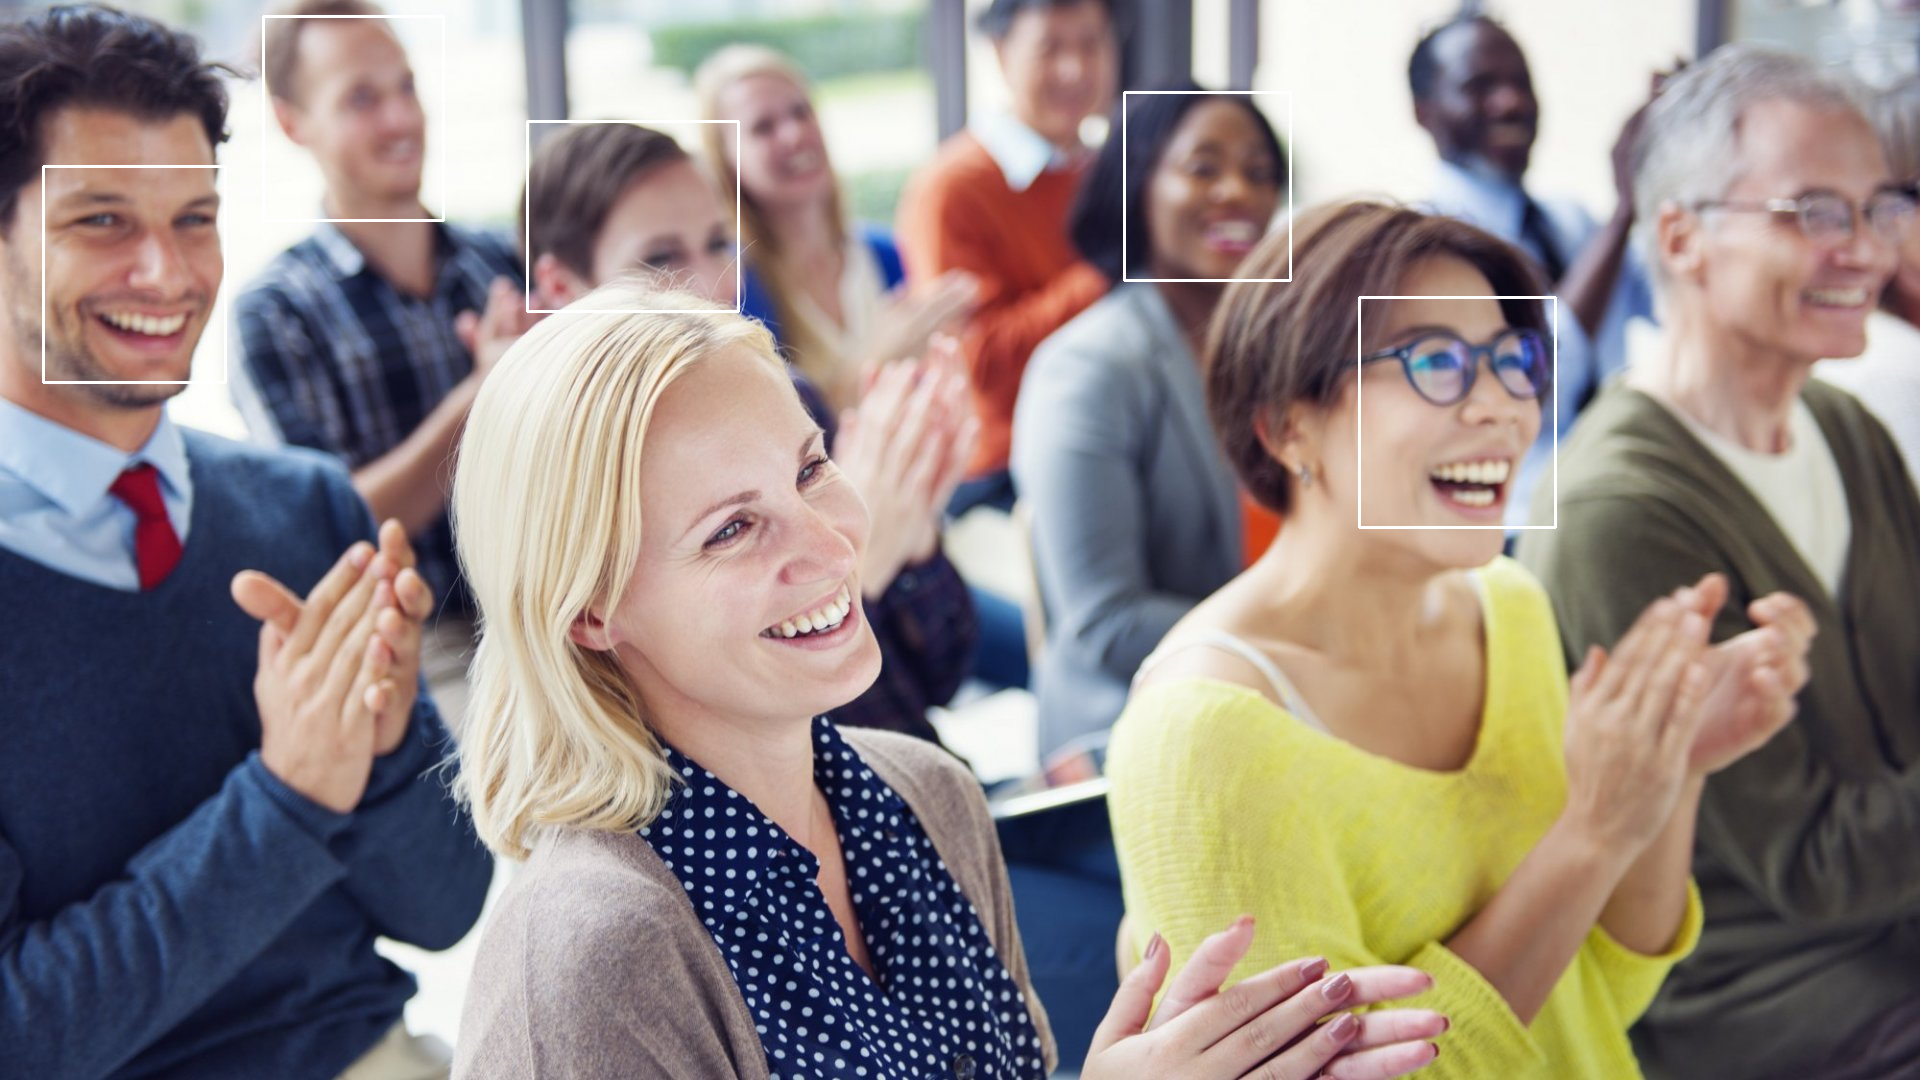

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = cv2.imread('./2.jpg', cv2.IMREAD_COLOR)
output = predict(img)
pred_boxes = np.array(output['instances']._fields['pred_boxes'].tensor.cpu(), dtype='int32')
pred_boxes
for i in pred_boxes:
  # cv2_imshow(img[i[1]:i[3],i[0]:i[2],:])
  cv2.rectangle(img, (i[0], i[1]), (i[2], i[3]), (255,255,255), 2)
cv2_imshow(img)

In [ ]:
output

{'instances': Instances(num_instances=5, image_height=1080, image_width=1920, fields=[pred_boxes: Boxes(tensor([[1124.2477,   92.0535, 1290.2319,  280.9150],
         [  43.0174,  166.3338,  225.5887,  382.8062],
         [ 527.2148,  121.0697,  738.8868,  311.2491],
         [ 263.1065,   16.6864,  443.1927,  220.2487],
         [1359.0200,  297.5055, 1555.9602,  527.6324]], device='cuda:0')), scores: tensor([0.6146, 0.6068, 0.5551, 0.5382, 0.5173], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0, 0], device='cuda:0')])}